# This is the code part for the movie recommendations system





To compute the similarity between we are going to use the cosine approach to determine the distance between users / items

<img src="cosine.png" width="300">

This means that we are not going to compare them based on the distance between their vector values, but taking into account the direction in which they are pointing

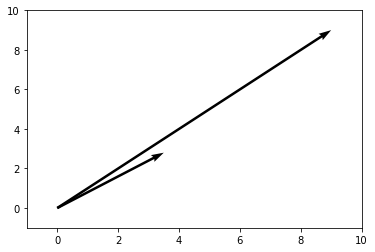

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

soa = np.array([[0, 0, 3.5, 2.8], [0, 0, 9, 9]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

### For our first model we are going to use a K-nearest neighbors


<img src="knn.jpg" width="300">

What it does is to find similar users based on the rating that a user has done
Then it finds the nearest ones and based on their proximity, it computes a weighted average
and does a prediction for a certain user.

In [2]:
from surprise import Dataset, Reader
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict
import os

### Now we have imported our tools, we are going to import the data

In [20]:
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file('./ml-100k/u.data', reader=reader)
trainset, testset = train_test_split(data, test_size=.25)

#### Decalare our training model

#### We will use a KNN as explained 

In [21]:
model = KNNBasic(name='cosine', user_based=False)

In [22]:
model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [23]:
predictions = model.test(testset)

In [9]:
def set_top_recommendations(predictions, top_n = 3):
    
    # Define a default list for every user's predictions
    recommendations = defaultdict(list)
    
    # For every prediction, we are going to create a dictionary to store them by user
    for user_id, movie_id, _, est, _ in predictions:
        recommendations[user_id].append((movie_id, est))
    
    # When we have them grouped by user, we are going to sort them by their estimation
    # meaning that the ones with higher estimation are the ones more likely that the user will like
    for user_id, user_ratings in recommendations.items():
        # For every user, we sort from highest to lowest according to estimation
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        # Then we only store the ones for which the limit was given
        recommendations[user_id] = user_ratings[:top_n]
     
    return recommendations


In [14]:
def display_movie_names():
    
    # What this method is aiming to do is to transform the ids of the movies
    # into their names so it is more user friendly

    file_name = ('./ml-100k/u.item')
    id_name = {}
    with open(file_name, 'r') as f:
        for line in f:
            line = line.split('|')
            id_name[line[0]] = line[1]
 
    return id_name


In [25]:
top_recommendations = set_top_recommendations(predictions,4)
id_names = display_movie_names()
user_id = str(263)
print(user_id, [id_names[movie_id] for (movie_id, _) in top_recommendations[user_id]])

263 ['Shawshank Redemption, The (1994)', "It's a Wonderful Life (1946)", 'Alien (1979)', 'As Good As It Gets (1997)']


In [26]:
print(accuracy.rmse(predictions))

RMSE: 0.9832
0.9831581787887709


# Now we are going to use the SVD algorithm to compare their accuracy

### How does it work?


<img src="svd matrix.png" width="500">

So that every user/item is mapped into a k dimensional space and in that way thwy can be closely related to new predictions

<img src="svd map.png" width="500">


What to do for an unknown value?


<img src="prediction.png" width="500">



## For this part we are using the SVD algorithm better explained in the report

### We will use the same training and testing set to see how it behaves under the same conditions

In [30]:
modelSVD = SVD()

### Now we train our model with the training data and make predictions for our test set

In [28]:
algo.fit(trainset)
resultsSVD = algo.test(testset)

### As before we want to measure our models performance so that we can compare it

In [29]:
accuracy.rmse(resultsSVD)

RMSE: 0.9450


0.9449797499293449

In [31]:
top_recommendations = set_top_recommendations(predictions,4)
id_names = display_movie_names()
user_id = str(263)
print(user_id, [id_names[movie_id] for (movie_id, _) in top_recommendations[user_id]])


263 ['Cool Hand Luke (1967)', 'Alien (1979)', 'Shawshank Redemption, The (1994)', 'Gandhi (1982)']
